In [30]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
 

## Los datos

In [2]:
li = [4,48]
r = [i for i in range(max(li)) if i not in li]
milit = pd.read_csv(r'/home/nicole/Documents/books/modelado y simulación/trabajo3 tensores y autovalores/Military expenditure (% of GDP) - Colombia.csv', skiprows=r,nrows= max(li))
milit = milit.head(1).dropna(axis = 1)

In [3]:
milit

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Colombia,COL,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.884323,2.143256,3.099415,3.51514,3.180804,3.190947,...,3.863295,3.631149,3.072783,3.166777,3.288825,3.132228,3.130893,3.075072,3.186273,3.17256


In [4]:
helth = pd.read_csv(r'/home/nicole/Documents/books/modelado y simulación/trabajo3 tensores y autovalores/Current health expenditure (% of GDP) - Colombia.csv', skiprows=r,nrows= max(li))
helth = helth.head(1).dropna(axis = 1)

In [5]:
helth

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Colombia,COL,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,5.652304,5.96032,5.750262,5.792491,5.816432,6.085412,...,6.855401,7.308318,7.082657,6.790699,6.752311,7.262699,7.14658,7.297423,7.21368,7.226281


In [6]:
sci = pd.read_csv(r'/home/nicole/Documents/books/modelado y simulación/trabajo3 tensores y autovalores/Research and development expenditure (% of GDP) - Colombia.csv', skiprows=r,nrows= max(li))
sci = sci.head(1).dropna(axis = 1)

In [7]:
sci

,Country Name,Country Code,Indicator Name,Indicator Code,1996,1997,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Colombia,COL,Research and development expenditure (% of GDP),GB.XPD.RSDV.GD.ZS,0.29923,0.27366,0.12999,0.13183,0.13944,0.15602,...,0.196,0.19532,0.20625,0.234,0.27128,0.30563,0.28975,0.26694,0.24294,0.23699


In [8]:
edu = pd.read_csv(r'/home/nicole/Documents/books/modelado y simulación/trabajo3 tensores y autovalores/Government expenditure on education, total (% of GDP) - Colombia.csv', skiprows=r,nrows= max(li))
edu = edu.head(1).dropna(axis = 1)

In [9]:
edu

,Country Name,Country Code,Indicator Name,Indicator Code,1979,1980,1981,1984,1985,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Colombia,COL,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,1.75434,1.72912,2.59724,3.00429,2.71527,2.70525,...,4.77454,4.84159,4.47262,4.37448,4.88174,4.62946,4.47039,4.47721,4.53688,4.50259


## Matriz de covarianza

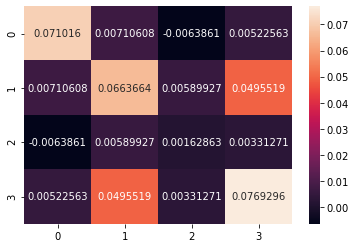

In [31]:
military = np.array(milit.loc[0,'2007':'2017'], dtype = float) 
health = np.array(helth.loc[0,'2007':'2017'], dtype = float) 
science = np.array(sci.loc[0,'2007':'2017'], dtype = float) 
education = np.array(edu.loc[0,'2007':'2017'], dtype = float) 

data = np.array([military,health,science,education])

covMatrix = np.cov(data,bias=True)
#print (covMatrix)

sn.heatmap(covMatrix, annot=True, fmt='g')
plt.savefig('covar.png')
plt.show()

Autovalores y autovectores de la matriz de covarianza

In [11]:
w, v = np.linalg.eig(covMatrix)

print(w)
print(v)

[0.12314997 0.07040729 0.0003637  0.02201972]
[[ 0.1581883   0.98218587 -0.09924119  0.02094207]
 [ 0.66229027 -0.07884676  0.12016155 -0.73533393]
 [ 0.0437666  -0.10445368 -0.98737684 -0.11072889]
 [ 0.73104893 -0.13484635 -0.02827295  0.66826982]]


## Matriz de correlación

In [40]:
data1 = {'d' : milit.loc[0,'2007':'2017'].astype(float),
        's' : helth.loc[0,'2007':'2017'].astype(float),
        'c' : sci.loc[0,'2007':'2017'].astype(float),
        'e' : edu.loc[0,'2007':'2017'].astype(float)
        }

In [41]:
df = pd.DataFrame(data1,columns=['d','s','c','e'])
#print (df)

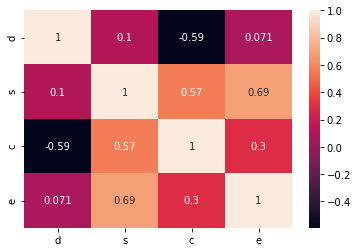

In [42]:
corrMatrix = df.corr()
#print (corrMatrix)

sn.heatmap(corrMatrix, annot=True)
plt.savefig('correlation.png')
plt.show()